# Bank Marketing Propensity Model

## Introduction <br>

Banks conduct direct marketing campaigns (direct in that they are targeting specific recipients by sending them mail offers, or even through telemarketing campaigns) to attract new customers/borrowers for financial products.  Applying marketing efforts to the population in a blanket advertising effort is often expensive and results in few responses or opened accounts.  Better predicting whether an individual is likely to respond to an offer helps firms target new customers more efficiently and effectively. <br> <br> The data for this analysis is related to the direct marketing of a Portuguese banking institution via a telemarketing campaign. The classification goal is to predict whether the client will subscribe a term deposit (variable y). <br>
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing


![Chart Image](https://user-images.githubusercontent.com/30188729/35842021-83caf324-0ab4-11e8-916b-61ebdaee9afe.png)

To understand the data, we should at least have a high level understanding of the product being offered by this particular campaign.
<br><br>
Definition of a term deposit from investopedia: 
"When an account holder makes a deposit at a bank, s/he is, in effect, providing the bank with funds which are used to loan borrowers. In return, the bank pays interest to the customer as compensation for allowing it to loan the deposited money to other bank clients. However, with most bank accounts, the account holder can withdraw his or her money at any time. To ensure that it has the funds for a fixed period of time, the bank can issue a type of financial product known as a term deposit."
<br>
Read more: Term Deposit | Investopedia https://www.investopedia.com/terms/t/termdeposit.asp#ixzz56McZQ8zJ 
<br><br>
Term deposits are generally considered a safe and reliable way to manage your money, somewhat like a savings account.  The trends of customers opening these accounts would therefore be related to macroeconomic shifts.  For instance, during an economic boom, I would assume customers more likely to invest in options that are slightly riskier which higher rewards than a term deposit.  Inversely, during times of economic downturn, a term deposit could be viewed as one of the safest ways to grow your money.<br>
https://www.moneysmart.gov.au/investing/investments-paying-interest/term-deposits

## *Table of Contents* <a class="anchor" id="top"></a>

1. [Import Data & Python Packages](#1-bullet) <br>
    * [1.1 Imports and Data Upload](#2.1-bullet) <br>
    * [1.2 Data Dictionary](#1.2-bullet) <br>  <br>
2. [Exploratory Data Analysis](#2-bullet)<br>
    * [2.1 Occupation](#2.1-bullet) <br>
    * [2.2 Age](#2.2-bullet) <br> 
    * [2.3 Marital Status](#2.3-bullet) <br>
    * [2.4 Education](#2.4-bullet) <br>
    * [2.5 Default Status](#2.5-bullet) <br>
    * [2.6 Campaign Contact History](#2.6-bullet) <br>
    * [2.7 Month](#2.7-bullet) <br>
    * [2.8 Correlation Heatmaps & Duration Analysis](#2.8-bullet) <br><br>
3. [Final Modeling Dataset](#3-bullet)<br>
    * [3.1 Data Preparation](#3.1-bullet) <br>
    * [3.2 Test & Train split](#3.2-bullet) <br> <br>
4. [Candidate Model 1: Logistic Regression](#4-bullet) <br>
    * [4.1 Model Build](#4.1-bullet) <br>
    * [4.2 Out-of-sample test results](#4.2-bullet) <br> <br>
5. [Candidate Model 2: Random Forest Estimation](#5-bullet) <br>
    * [5.1 Model Build](#5.1-bullet) <br>
    * [5.2 Out-of-sample test results](#5.2-bullet) <br> <br>
6. [Candidate Model 3: Decision Tree](#6-bullet) <br>
    * [6.1 Model Build](#6.1-bullet) <br>
    * [6.2 Out-of-sample test results](#6.2-bullet) <br> <br>
7. [Candidate Model 4: Gradient Boosting Algorithm](#7-bullet) <br>
    * [7.1 Model Build](#7.1-bullet) <br>
    * [7.2 Out-of-sample test results](#7.2-bullet) <br> <br>
8. [Candidate Model 5: Linear SVC](#8-bullet) <br>
    * [8.1 Model Build](#8.1-bullet) <br>
    * [8.2 Out-of-sample test results](#8.2-bullet) <br> <br>
9. [Selection of Champion Model](#9-bullet) <br> <br>
10. [Conclusions and Business Implications](#10-bullet) <br>

## 1. Data & Python Packages <a class="anchor" id="1-bullet"></a>

## 1.1 Imports & Data upload <a class="anchor" id="1.1-bullet"></a>

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\sgus1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
### Load student pass/fail data into Pandas
### Import raw data from GitHub
url = 'https://raw.githubusercontent.com/sgus1318/glossy-chromosome/master/bank-additional-full.csv'
df = pd.read_csv(url)

In [3]:
## View all column names
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

#### [Back to top](#top) 

## 1.2 Data Dictionary: <a class="anchor" id="1.2-bullet"></a>

#### Bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
#### Campaign Data:
8 - contact: contact communication type (categorical: 'cellular','telephone')  <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). *IMPORTANT NOTE: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*  <br>
#### Other:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)  <br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  <br>
#### Macroeconomic variables:
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  <br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
20 - nr.employed: number of employees - quarterly indicator (numeric) <br>

#### Output variable (target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>

In [4]:
## View raw data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


#### [Back to top](#top) 

## 2. Exploratory Data Analysis <a class="anchor" id="2-bullet"></a>

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000
mean,40.024,258.285,2.568,962.475,0.173,0.082,93.576,-40.503,3.621,5167.036
std,10.421,259.279,2.770,186.911,0.495,1.571,0.579,4.628,1.734,72.252
min,17.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.634,4963.600
25%,32.000,102.000,1.000,999.000,0.000,-1.800,93.075,-42.700,1.344,5099.100
50%,38.000,180.000,2.000,999.000,0.000,1.100,93.749,-41.800,4.857,5191.000
75%,47.000,319.000,3.000,999.000,0.000,1.400,93.994,-36.400,4.961,5228.100
max,98.000,4918.000,56.000,999.000,7.000,1.400,94.767,-26.900,5.045,5228.100


In [6]:
df_final = pd.get_dummies(df, columns=["y"])

In [7]:
df_final.rename(index=str, columns={"y_yes": "Made_Deposit"},inplace=True)
df_final.drop('y_no', axis=1, inplace=True)

In [8]:
df_final.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Made_Deposit
count,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000
mean,40.024,258.285,2.568,962.475,0.173,0.082,93.576,-40.503,3.621,5167.036,0.113
std,10.421,259.279,2.770,186.911,0.495,1.571,0.579,4.628,1.734,72.252,0.316
min,17.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.634,4963.600,0.000
25%,32.000,102.000,1.000,999.000,0.000,-1.800,93.075,-42.700,1.344,5099.100,0.000
50%,38.000,180.000,2.000,999.000,0.000,1.100,93.749,-41.800,4.857,5191.000,0.000
75%,47.000,319.000,3.000,999.000,0.000,1.400,93.994,-36.400,4.961,5228.100,0.000
max,98.000,4918.000,56.000,999.000,7.000,1.400,94.767,-26.900,5.045,5228.100,1.000


### Of the entire 41,188 sample, 11.3% of them were successfully converted into customers.

#### [Back to top](#top) 

### 2.1 Occupation <a class="anchor" id="2.1-bullet"></a>

Text(0.5,1,'Propensity by Occupation')

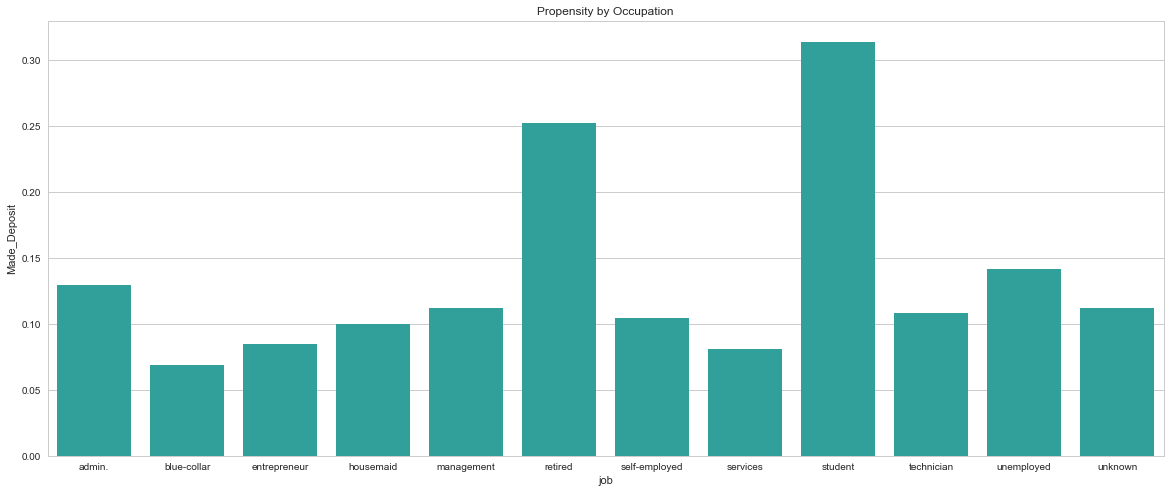

In [9]:
plt.figure(figsize=(20,8))
avg_by_job = df_final[["job", "Made_Deposit"]].groupby(['job'],as_index=False).mean()
g = sns.barplot(x='job', y="Made_Deposit", data=avg_by_job, color="LightSeaGreen")
plt.title('Propensity by Occupation')

Students and retirees had the highest propensity to open an account.  However, it's worth noting (based on the barchart below) that there are also very few observations for both retired and student call recipients. "Admin" were also more likely to open accounts than other occupations, and there were over 10k observations for this category.  This seems like a more reliable estimate. <br> <br>

It's also worth pointing out that Blue-collar and "services" were the least likely to open accounts following the telemarketing call.

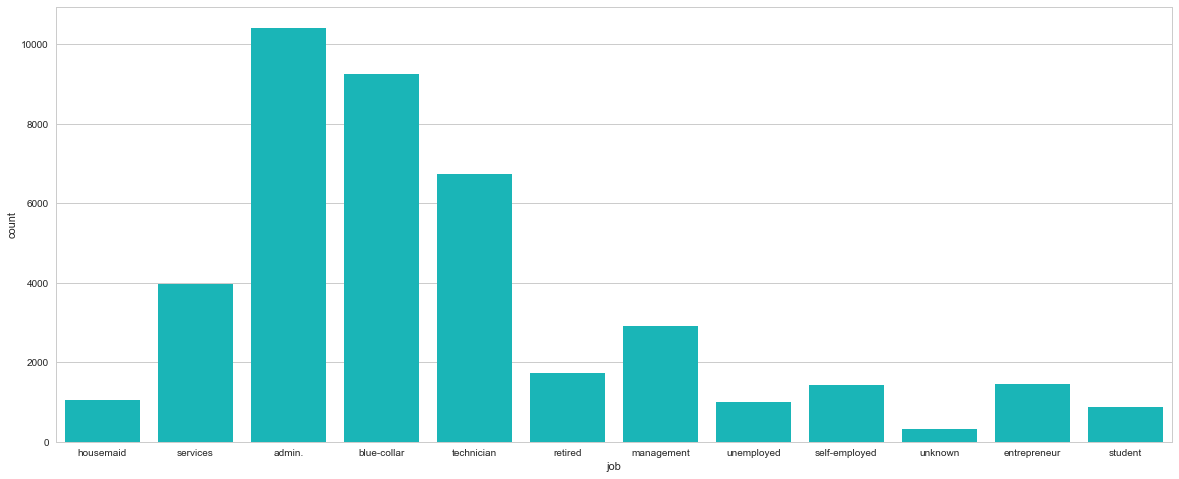

In [10]:
plt.figure(figsize=(20,8))
sns.countplot('job', data=df_final, color="darkturquoise")
plt.show()

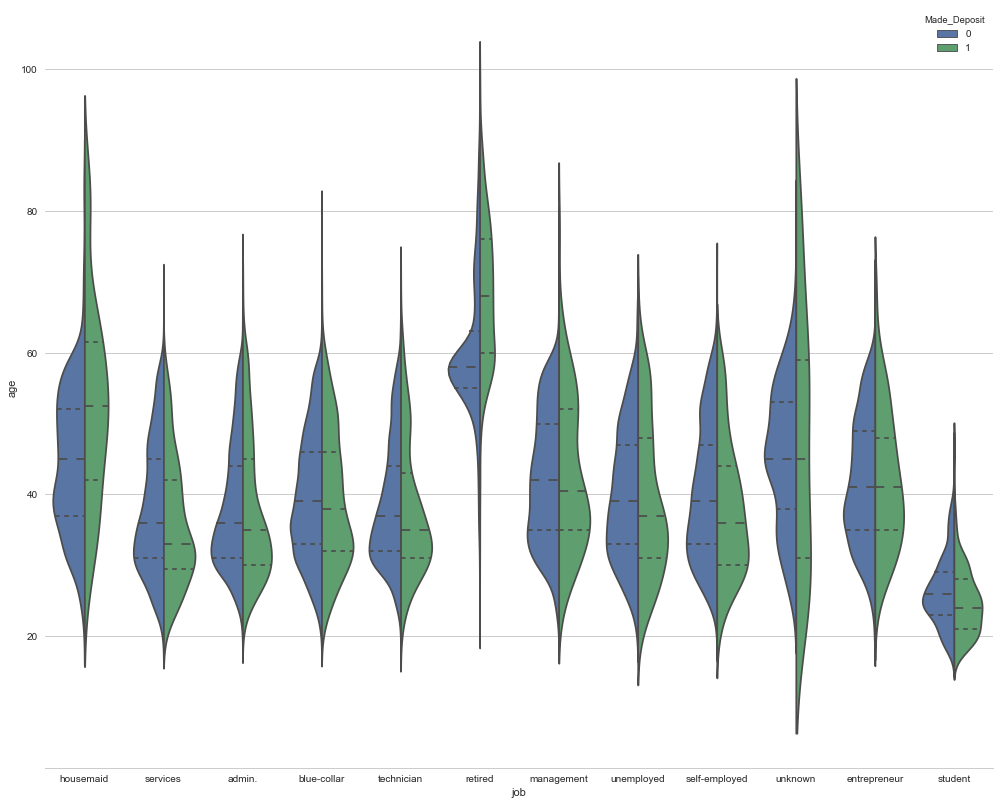

In [11]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

#Draw a nested violinplot and split the violins for easier comparison
plt.subplots(figsize=(17,14))
sns.violinplot(x="job", y="age", hue="Made_Deposit", data=df_final, split=True,
               inner="quart")
sns.despine(left=True)

The distributions of age by occupation are very similar for both the "opened" and "did not open account" populations.  Notably, the distribution of age for retired individuals who opened accounts is higher and more spread out than those who refused to open accounts.  It's likely that there were just a few older individuals who opened accounts, but a vast proportion of all retired call recipients did not invest at all.

#### [Back to top](#top) 

### 2.2 Age <a class="anchor" id="2.2-bullet"></a>

In [12]:
df_age = df_final.copy()

In [13]:
df_age['binned'] = pd.cut(df_age['age'], 15)

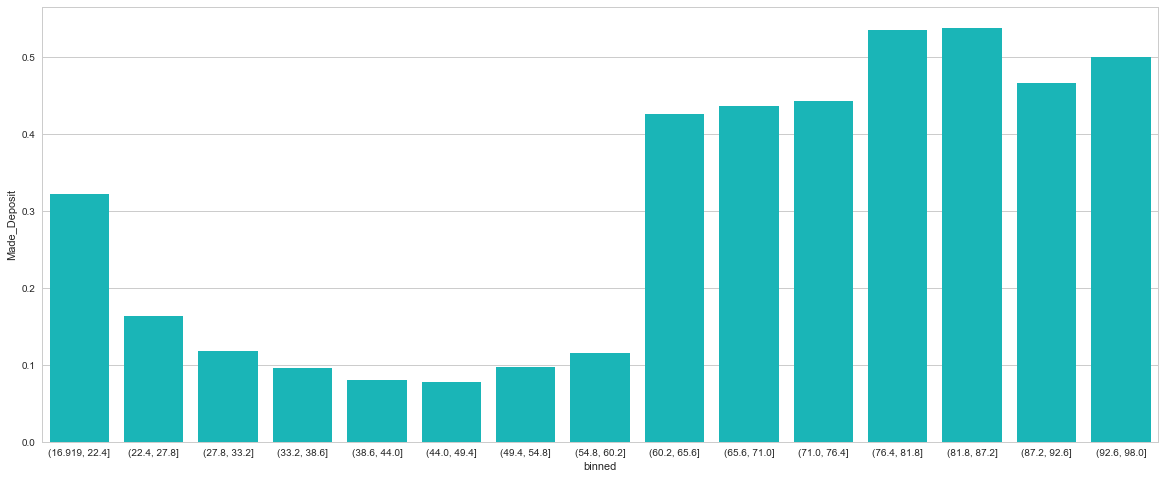

In [14]:
plt.figure(figsize=(20,8))
avg_by_age = df_age[["binned", "Made_Deposit"]].groupby(['binned'],as_index=False).mean()
g = sns.barplot(x='binned', y="Made_Deposit", data=avg_by_age, color="darkturquoise")

Individuals over 60 were most likely to invest after the telemarketing call.  There is also a increased likelihood for individuals 22 and younger.  However, if you look at the histogram below it's apparent that the vast majority of call recipients were *between* the ages of 22 and 60, and that their likelihood to respond was much closer to the overall average of 11%. 

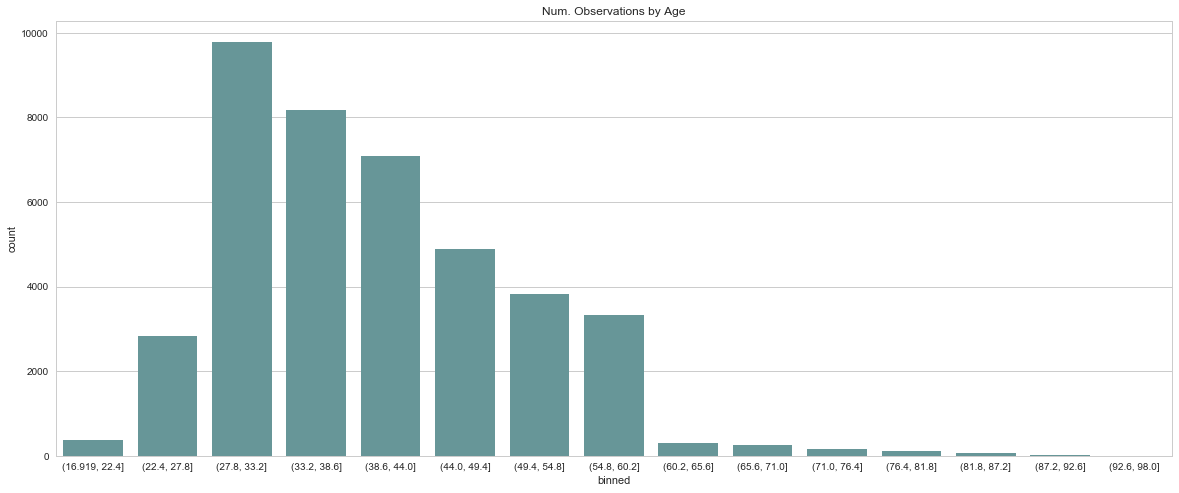

In [15]:
plt.figure(figsize=(20,8))
sns.countplot('binned', data=df_age, color="cadetblue")
plt.title('Num. Observations by Age')
plt.show()

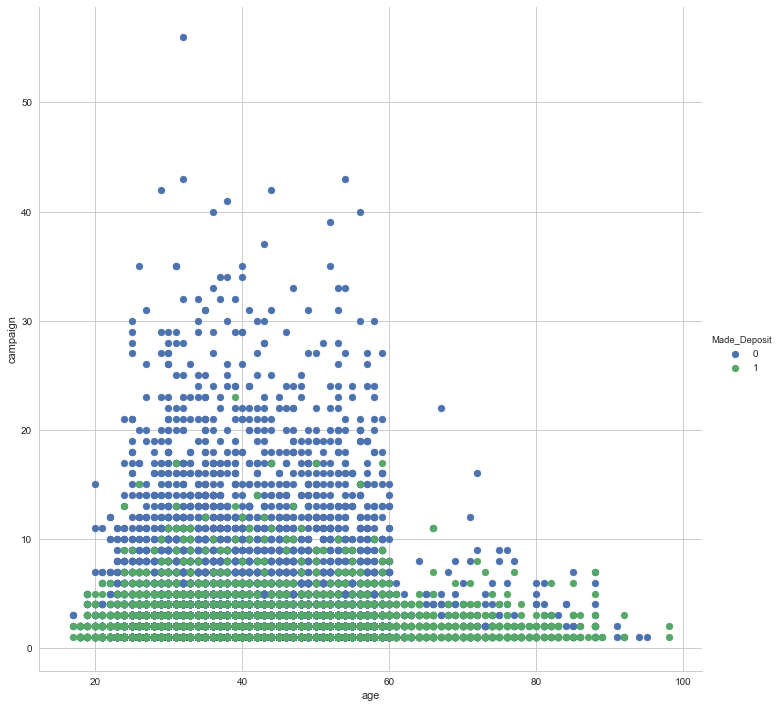

In [35]:
sns.FacetGrid(df_final, hue="Made_Deposit", size=10) \
   .map(plt.scatter, "age", "campaign") \
   .add_legend()

Based on the above plot, it actually appears that age is a much less relevant classifer than "campaign" which relates to the number of contacts performed during this campaign.  The more likely someone was to be contacted, the less likely they were to invest... There is clear separation of the two classes (invested, did not invest) in this chart.

#### [Back to top](#top) 

### 2.3 Marital Status <a class="anchor" id="2.3-bullet"></a>

Text(0.5,1,'Propensity by Marital Status')

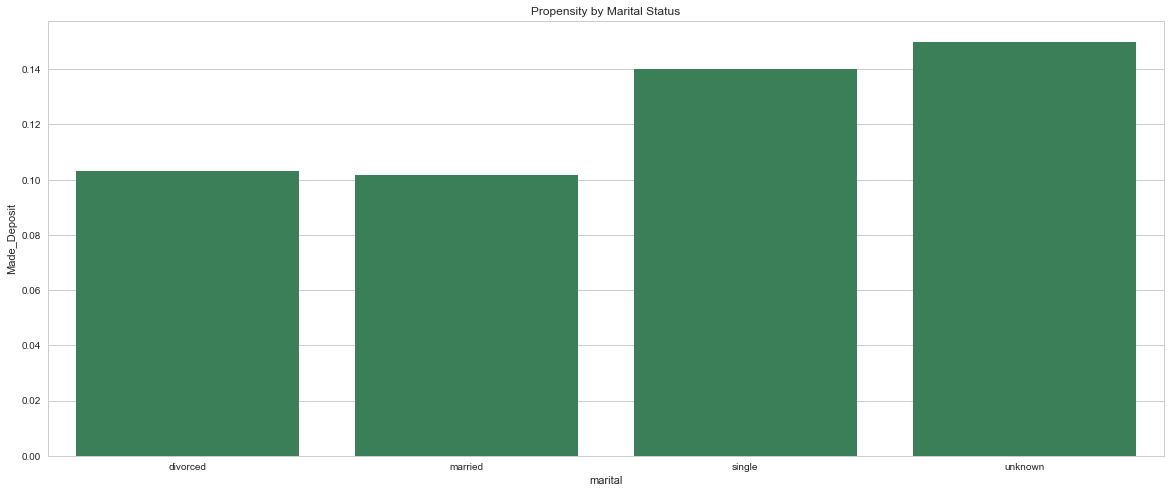

In [16]:
plt.figure(figsize=(20,8))
avg_by_marital = df_final[["marital", "Made_Deposit"]].groupby(['marital'],as_index=False).mean()
g = sns.barplot(x='marital', y="Made_Deposit",data=avg_by_marital, color="SeaGreen")
plt.title('Propensity by Marital Status')

Single individuals are more likely to invest than individuals who are married or who have previously been married (14% as compared to ~10% frequency).  There are very few observations categorized as "unknown", so we won't draw any conclusions from that particular bar of the chart.

#### [Back to top](#top) 

### 2.4 Education <a class="anchor" id="2.4-bullet"></a>

Text(0.5,1,'Propensity by Education')

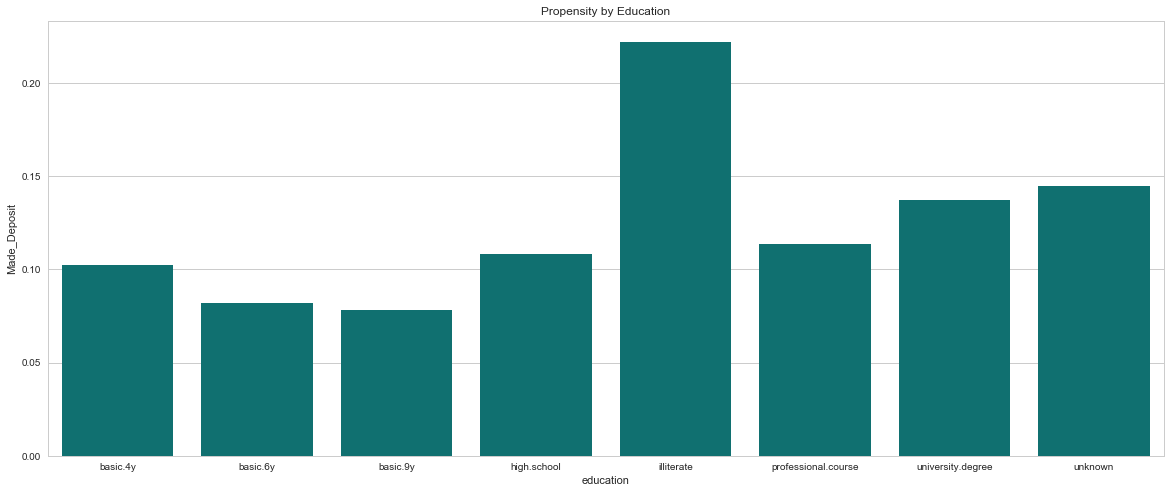

In [17]:
plt.figure(figsize=(20,8))
avg_by_edu = df_final[["education", "Made_Deposit"]].groupby(['education'],as_index=False).mean()
g = sns.barplot(x='education', y="Made_Deposit", data=avg_by_edu, color="teal")
plt.title('Propensity by Education')

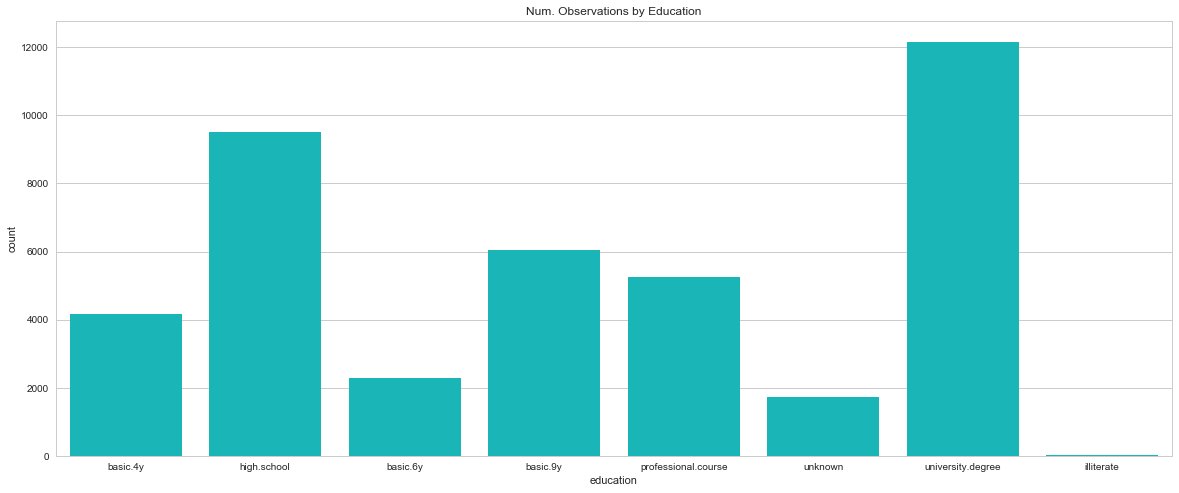

In [18]:
plt.figure(figsize=(20,8))
sns.countplot('education', data=df_final, color="darkturquoise")
plt.title('Num. Observations by Education')
plt.show()

Interestingly, individuals with a university degree or a high school degree (both large samples) invest at a higher rate than those with basic 6-9yr education. 

#### [Back to top](#top) 

### 2.5 Default Status <a class="anchor" id="2.5-bullet"></a>

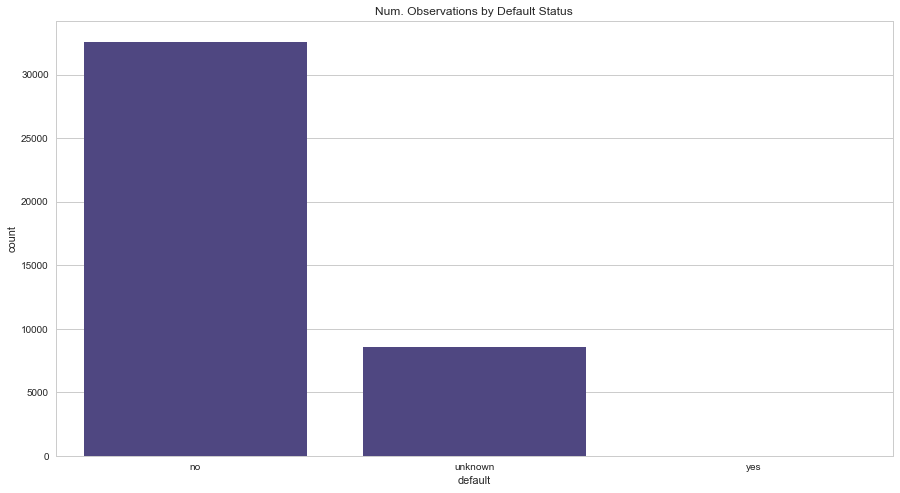

In [19]:
plt.figure(figsize=(15,8))
sns.countplot('default', data=df_final, color="darkslateblue")
plt.title('Num. Observations by Default Status')
plt.show()

The bank must have intentionally screened out individuals with accounts in default from their sample.  Individuals with accounts in default probably wouldn't have the cash to invest in a term deposit to begin with.

#### [Back to top](#top) 

### 2.6 Number of Contacts during Campaign <a class="anchor" id="2.6-bullet"></a>

Text(0.5,1,'Propensity by Number of Contacts during this Campaign')

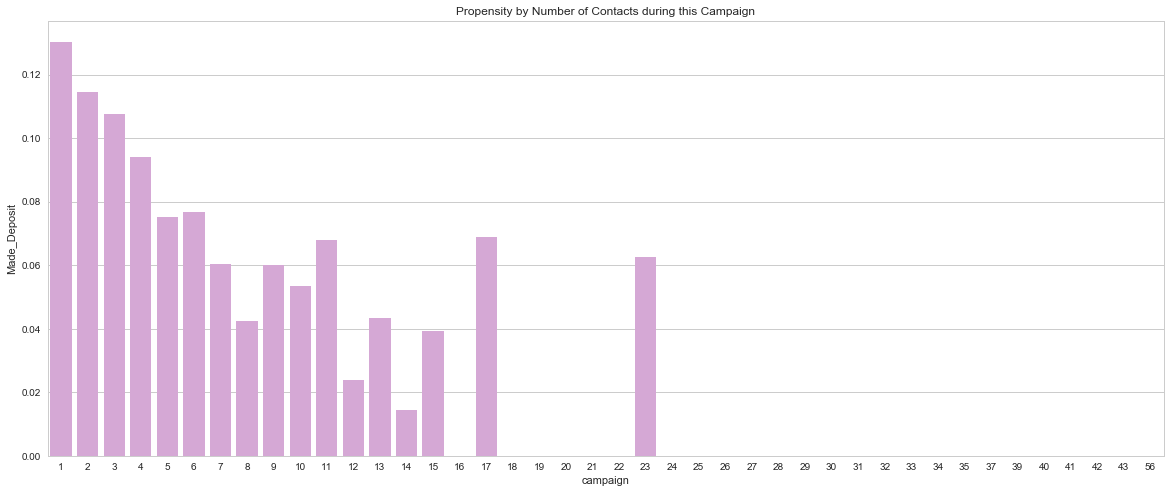

In [20]:
plt.figure(figsize=(20,8))
avg_by_num = df_final[["campaign", "Made_Deposit"]].groupby(['campaign'],as_index=False).mean()
g = sns.barplot(x='campaign', y="Made_Deposit", data=avg_by_num, color="plum")
plt.title('Propensity by Number of Contacts during this Campaign')

#### [Back to top](#top) 

### 2.7 Month <a class="anchor" id="2.7-bullet"></a>

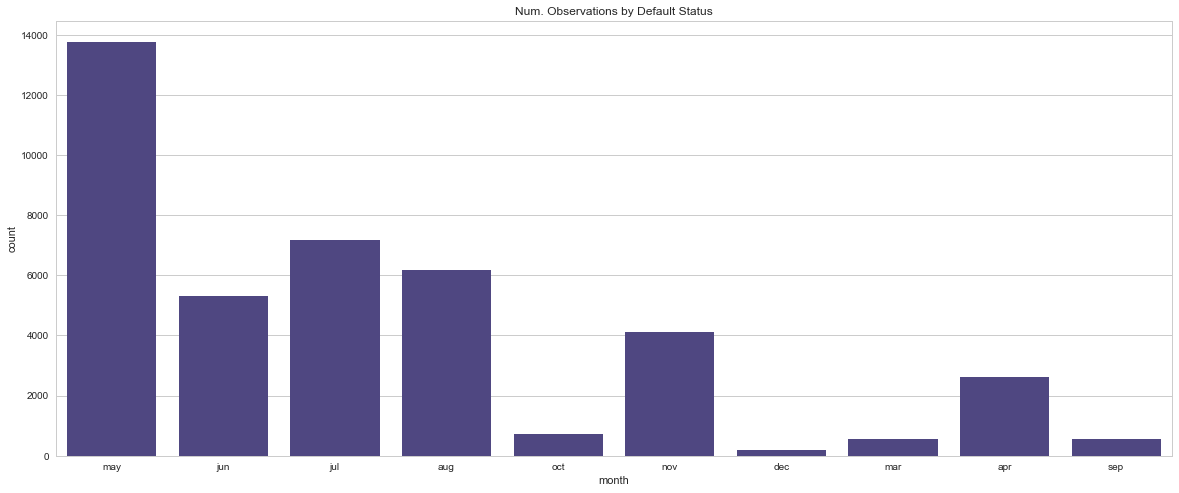

In [21]:
plt.figure(figsize=(20,8))
sns.countplot('month', data=df_final, color="darkslateblue")
plt.title('Num. Observations by Default Status')
plt.show()

More than 1/3 of the calls placed during this campaign took place in May.  It looks like the campaign was mostly run during the late spring and summer (~87% of calls took place April-August), although there was another campaign push in November with ~4,000 calls taking place during that month.

Text(0.5,1,'Account Open Rate by Month')

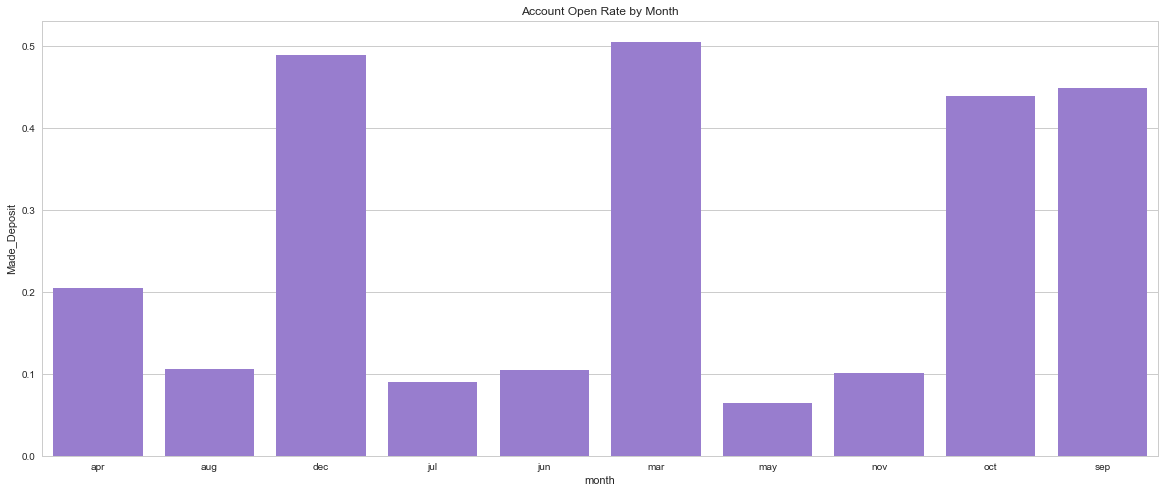

In [22]:
plt.figure(figsize=(20,8))
avg_by_mon = df_final[["month", "Made_Deposit"]].groupby(['month'],as_index=False).mean()
g = sns.barplot(x='month', y="Made_Deposit", data=avg_by_mon, color="mediumpurple")
plt.title('Account Open Rate by Month')

While most calls took place during the summer months, it appears that the individuals who were contacted during the off-months were more likely to create an account.  This is probably due to some caveat of the call strategy... Perhaps the individuals contacted during those months were already flagged as leads by the bank, or had previous accounts opened and were considering opening a second account. 

#### [Back to top](#top) 

### 2.8 Correlation Heatmaps & Duration Analysis <a class="anchor" id="2.8-bullet"></a>

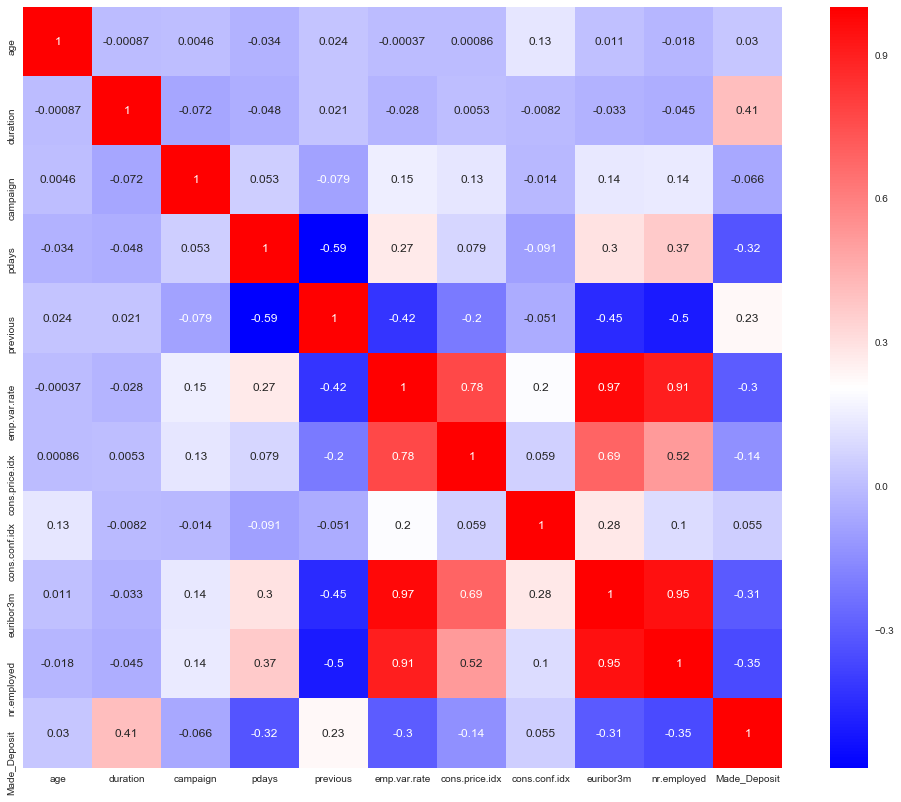

In [23]:
corr = df_final.corr()
plt.subplots(figsize=(17,14))
sns.heatmap(corr, annot=True,cmap="bwr")

The negative correlation between "Made Deposit" (success) and "nr.employed" and "euribor3m" indicates that when the economy is declining, people are more willing to invest in a term deposit, which are often seen as low-risk investments and a safe place to park your money.  <br><br>
Again, we need to ignore "duration" in our predictive model, as this information is unavailable at the time of deciding who to call.  However, it is very interesting that there is such a strong positive correlation.  It might be worth advising telemarketers to try and hold people on the phone as long as possible to help hook in a sale.  Then again- correlation is not causation.  It could just be that people who close sales are on the line longer out of necessity, because they need to provide the relevant personal information to create their term deposit at the bank. Regardless, let's look at this more closely...

Text(0.5,1,'Histogram of Call Duration (seconds)')

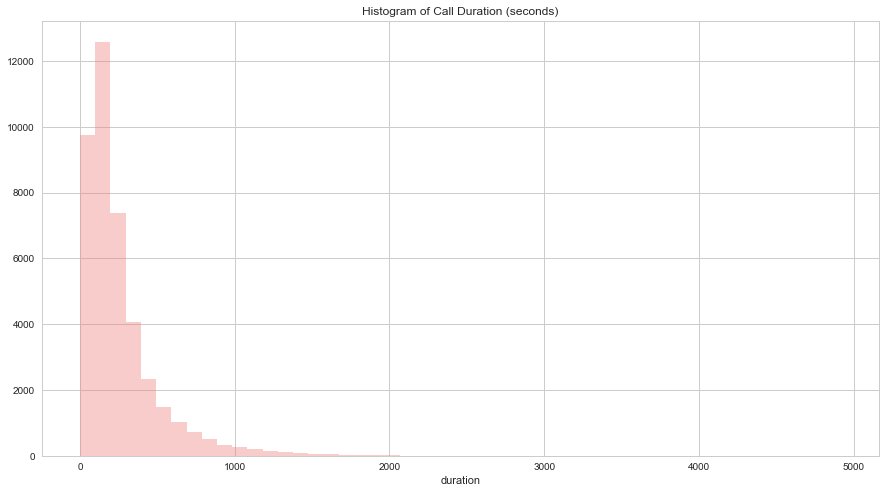

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(df_final["duration"], kde=False, color="lightcoral")
plt.title('Histogram of Call Duration (seconds)')

In [25]:
df_dur = df_final[df_final['duration'] < 1800]

Text(0.5,1,'Histogram of Call Duration (seconds)')

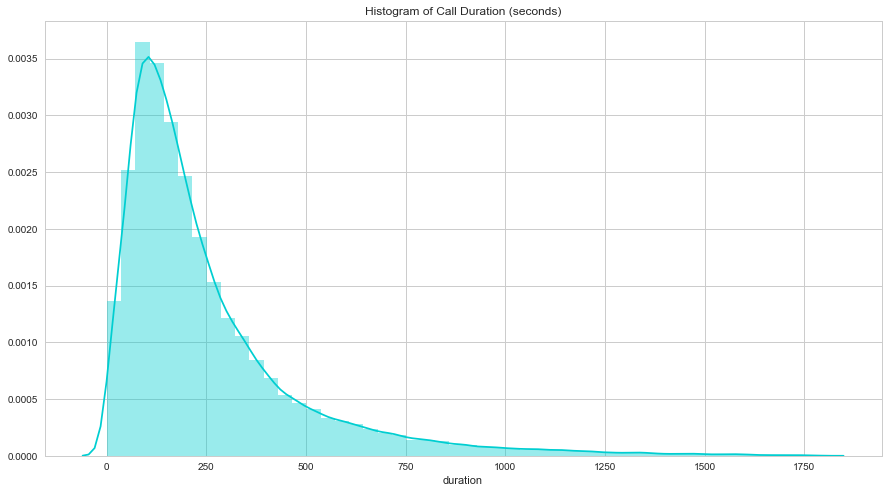

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(df_dur["duration"], kde=True, color="darkturquoise")
plt.title('Histogram of Call Duration (seconds)')

In [29]:
df_dur['binned'] = pd.cut(df_dur['duration'], 15)

C:\Users\sgus1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


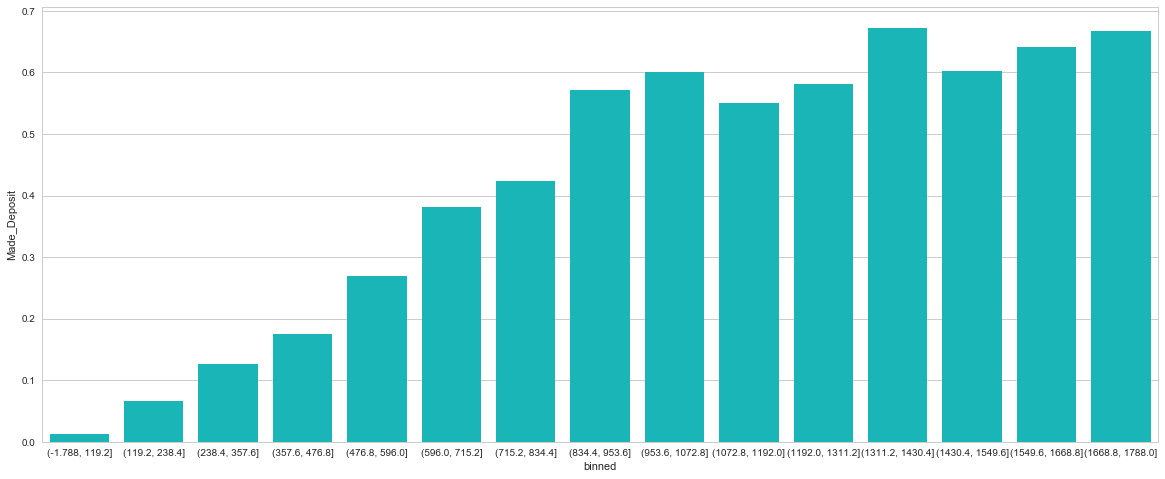

In [30]:
plt.figure(figsize=(20,8))
avg_by_dur = df_dur[["binned", "Made_Deposit"]].groupby(['binned'],as_index=False).mean()
g = sns.barplot(x='binned', y="Made_Deposit", data=avg_by_dur, color="darkturquoise")

In [ ]:
df_corr = pd.get_dummies(df_final)

In [ ]:
corr2 = df_corr.corr()

In [ ]:
plt.subplots(figsize=(17,14))
sns.heatmap(corr2, annot=False,cmap="bwr")

#### The variables that appear to have the strongest correlation include pdays, previous, emp.var.rate, euribor3m, nr.employed, contact (cellular vs. telephone), month, and poutcome. 

#### [Back to top](#top) 

## 2.9 Macroeconomic Variables

#### [Back to top](#top) 

## 3. Final Modeling Dataset <a class="anchor" id="3-bullet"></a>

### 3.1 Prepare modeling dataset <a class="anchor" id="3.1-bullet"></a>

1. Remove duration (not known ahead of making a call, so can't be used to predict a response)
2. Create dummy variable for pdays (if 999, then 0. else 1). Keep in the original pdays variable also.
3. Create dummy variable for previous (if greater than 0, then 1. else 0)
4. Create dummy variable for 'white collar', including management, entrepreneur, and admin.
4. Create dummies for all categorical variables
4. Include standard transformations for continuous variables (log, squared, square root, reciprocal)

In [ ]:
df_new = df_final.drop('duration',axis=1, inplace=False)

In [ ]:
df_new['prev_campaign_contact']=np.where(df_new['pdays']==999,0,1)

In [ ]:
df_new['prev_call']=np.where(df_new['previous']>0,1,0)

In [ ]:
def label_wc (row):
   if row['job'] == 'management' :
      return 1
   if row['job'] == 'admin.' :
      return 1
   if row['job'] == 'entrepreneur' :
      return 1
   return 0

In [ ]:
df_new['white_collar']=df_new.apply (lambda row: label_wc (row),axis=1)

In [ ]:
def squared(x):
    """squares each observation"""""
    return x*x

In [ ]:
def squareroot(x):
    """square root of each observation"""""
    return x**(0.5)

In [ ]:
def recip(x):
    """reciprocal of each observation"""""
    return 1/x

In [ ]:
df_new['age_sq']=df_new[['age']].apply(squared)
df_new['age_sqroot']=df_new[['age']].apply(squareroot)
df_new['age_recip']=df_new[['age']].apply(recip)
df_new['age_ln']=np.log(df_new['age'])

In [ ]:
df_new['emp.var.rate_sq']=df_new[['emp.var.rate']].apply(squared)
#df_new['emp.var.rate_sqroot']=df_new[['emp.var.rate']].apply(squareroot)
df_new['emp.var.rate_recip']=df_new[['emp.var.rate']].apply(recip)
#df_new['emp.var.rate_ln']=np.log(df_new['emp.var.rate']) produces undefined values due to negative index. leave out for now.

In [ ]:
df_new['cons.price.idx_sq']=df_new[['cons.price.idx']].apply(squared)
df_new['cons.price.idx_sqroot']=df_new[['cons.price.idx']].apply(squareroot)
df_new['cons.price.idx_recip']=df_new[['cons.price.idx']].apply(recip)

In [ ]:
df_new['cons.conf.idx_sq']=df_new[['cons.conf.idx']].apply(squared)
#df_new['cons.conf.idx_sqroot']=df_new[['cons.conf.idx']].apply(squareroot)
df_new['cons.conf.idx_recip']=df_new[['cons.conf.idx']].apply(recip)

In [ ]:
df_new['euribor3m_sq']=df_new[['euribor3m']].apply(squared)
df_new['euribor3m_sqroot']=df_new[['euribor3m']].apply(squareroot)
df_new['euribor3m_recip']=df_new[['euribor3m']].apply(recip)

In [ ]:
df_new['nr.employed_sq']=df_new[['nr.employed']].apply(squared)
df_new['nr.employed_sqroot']=df_new[['nr.employed']].apply(squareroot)
df_new['nr.employed_recip']=df_new[['nr.employed']].apply(recip)
df_new['nr.employed_ln']=np.log(df_new['nr.employed'])

In [ ]:
df_new.head()
## 40 predictor variables will be tested in our models

In [ ]:
df_new2=pd.get_dummies(df_new)

In [ ]:
list(df_new2)

#### [Back to top](#top) 

### 3.2 Split Data into Test & Train <a class="anchor" id="3.2-bullet"></a>

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new2, test_size=0.2,random_state=18)

#### [Back to top](#top) 

## 4. Candidate Model 1: Logistic Regression <a class="anchor" id="4-bullet"></a>

To start, I implemented a Logistic Regression.  Logistic Regressions are one of the most common classifier models, and they are often utilized in the banking industry for propensity modeling along with the Weight of Evidence technique. <br><br>
"Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry." - Norman Matloff, Python Machine Learning Second Edition, Ch. 3

https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/ <br>
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/ <br>

"A very convenient and useful side effect of a logistic regression solution is that it doesn’t give you discrete output or outright classes as output. Instead you get probabilities associated with each observation. You can apply many standard and custom performance metrics on this probability score to get a cutoff and in turn classify output in a way which best fits your business problem. A very popular application of this property is scorecards in the financial industry ,where you can adjust your threshold to get different results for classification from the same model."

#### [Back to top](#top) 

### 4.1 Model Build <a class="anchor" id="4.1-bullet"></a>

The computation behind the scenes of the sklearn logistic regression model didn't like some of my transformed variables, so this is not the same comprehensive list that was included for our 4 other modeling approaches.

In [ ]:
X=train[['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'prev_campaign_contact',
 'prev_call',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'poutcome_failure',
 'poutcome_nonexistent',
 'loan_no',
 'loan_unknown',
 'age_sq',
 'age_sqroot',
 'age_ln']]
y=train['Made_Deposit']

In [ ]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

#### Iteratively removed variables with insigificant p-values.

In [ ]:
X2=train[['age',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'prev_campaign_contact',
 'prev_call',
 'job_admin.',
 'education_basic.4y',
 'education_basic.9y',
 'education_high.school',
 'contact_cellular',
 'month_aug',
 'month_dec',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_nonexistent',
 'age_sq']]
y2=train['Made_Deposit']

In [ ]:
logit_model=sm.Logit(y2,X2)
result2=logit_model.fit()
print(result2.summary())

#### The model's in and out of sample fit is assessed by the mean accuracy on the given test data and labels.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X2, y2)
logreg.score(X2, y2)

#### [Back to top](#top) 

### 4.2 Out-of-sample Test Results <a class="anchor" id="4.2-bullet"></a>

In [ ]:
Xtest=test[['age',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'prev_campaign_contact',
 'prev_call',
 'job_admin.',
 'education_basic.4y',
 'education_basic.9y',
 'education_high.school',
 'contact_cellular',
 'month_aug',
 'month_dec',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_nonexistent',
 'age_sq']]
ytest=test['Made_Deposit']

In [ ]:
logreg = LogisticRegression()
logreg.fit(X2, y2)
logreg.score(Xtest, ytest)

#### Very little indication that the model is overfit on the development sample.  The out-of-sample performance clearly does not demonstrate that there is any deterioration in predictive power.

#### [Back to top](#top) 

## 5. Candidate Model 2: Random Forest Estimation <a class="anchor" id="5-bullet"></a>

"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting." <br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

"The forest error rate depends on two things: The correlation between any two trees in the forest. Increasing the correlation increases the forest error rate. The strength of each individual tree in the forest. A tree with a low error rate is a strong classifier. Increasing the strength of the individual trees decreases the forest error rate. Reducing m (number of input variables) reduces both the correlation and the strength. Increasing it increases both. Somewhere in between is an "optimal" range of m." <br>
<br>
Features of Random Forests
* It is unexcelled in accuracy among current algorithms.
* It runs efficiently on large data bases.
* It can handle thousands of input variables without variable deletion.
* It gives estimates of what variables are important in the classification.
* It generates an internal unbiased estimate of the generalization error as the forest building progresses.
* It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
* It has methods for balancing error in class population unbalanced data sets.
* Generated forests can be saved for future use on other data.
* Prototypes are computed that give information about the relation between the variables and the classification.
* It computes proximities between pairs of cases that can be used in clustering, locating outliers, or (by scaling) give interesting views of the data.
* The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
* It offers an experimental method for detecting variable interactions.
* Random forests does not overfit. You can run as many trees as you want."<br>
#### This is a really great resource on RF:
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

#### [Back to top](#top) 

### 5.1 Model Build <a class="anchor" id="5.1-bullet"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X=train.drop('Made_Deposit',axis=1, inplace=False)
y=train['Made_Deposit']

random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(X, y)
random_forest.score(X, y)

#### The model's in and out of sample fit is assessed by the mean accuracy on the given test data and labels.

#### [Back to top](#top) 

### 5.2 Out-of-sample Test Results <a class="anchor" id="5.2-bullet"></a>

In [ ]:
X_test=test.drop('Made_Deposit',axis=1, inplace=False)
y_test=test['Made_Deposit']

random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(X, y)
random_forest.score(X, y)

#### [Back to top](#top) 

## 6. Candidate Model 3: Decision Tree <a class="anchor" id="6-bullet"></a>

Decision Trees are widely utilized due to their ease of interpretation through visual representation.  "The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level. Handling this is know the attributes selection. We have different attributes selection measure to identify the attribute which can be considered as the root note at each level." <br><br>

"If a dataset consists of n attributes then deciding which attribute to place at the root or at different levels of the tree as internal nodes is a complicated step. By just randomly selecting any node to be the root can’t solve the issue. If we follow a random approach, it may give us bad results with low accuracy.<br>

For solving this attribute selection problem, researchers worked and devised some solutions. They suggested using some criterion like information gain, gini index, etc. These criterions will calculate values for every attribute. The values are sorted, and attributes are placed in the tree by following the order i.e, the attribute with a high value(in case of information gain) is placed at the root.<br>

While using information Gain as a criterion, we assume attributes to be categorical, and for gini index, attributes are assumed to be continuous."<br>

http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

#### [Back to top](#top) 

### 6.1 Model Build <a class="anchor" id="6.1-bullet"></a>

In [ ]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=15, min_samples_leaf=20)

In [ ]:
X=train.drop('Made_Deposit',axis=1,inplace=False)
y=train['Made_Deposit']

tree1.fit(X,y)

In [ ]:
import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
#tree1viz  ### Ran this in Kaggle's virtual environment to view the tree. Will need to review the splits for reasonableness

In [ ]:
#tree.export_graphviz(tree1_view, out_file='tree.dot') 

#### The model's in and out of sample fit is assessed by the mean accuracy on the given test data and labels.

In [ ]:
tree1.score(X,y)

#### [Back to top](#top) 

### 6.2 Out-of-sample Test Results <a class="anchor" id="6.2-bullet"></a>

In [ ]:
X_test=test.drop('Made_Deposit',axis=1, inplace=False)
y_test=test['Made_Deposit']

tree1.fit(X,y)
random_forest.score(X_test, y_test)

##### Slight deterioration in our hold-out sample, but it's still very strong in terms of predictive power.

#### [Back to top](#top) 

## 7. Candidate Model 4: Gradient Boosted Algorithm <a class="anchor" id="7-bullet"></a>

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html<br><br>
"The “Gradient Boosting” classifier will generate many weak, shallow prediction trees and will combine, or “boost”, them into a strong model. This model performs very well on our data set, but has the drawback of being relatively slow and difficult to optimize, as the model construction happens sequentially so it cannot be parallelized." -https://blog.socialcops.com/engineering/machine-learning-python/

#### [Back to top](#top) 

### 7.1 Model Build <a class="anchor" id="7.1-bullet"></a>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradboost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,
                                max_depth=5, subsample=0.5,max_features=0.5)

gradboost.fit(X,y)

#### The model's in and out of sample fit is assessed by the mean accuracy on the given test data and labels.

In [ ]:
gradboost.score(X, y)

#### [Back to top](#top) 

### 7.2 Out-of-sample Test Results <a class="anchor" id="7.2-bullet"></a>

In [ ]:
gradboost.score(X_test, y_test)

#### [Back to top](#top) 

## 8. Candidate Model 5: Linear SVC <a class="anchor" id="8-bullet"></a>

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<br><br>
"The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples."
<br><br>
"Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces."<br>
https://en.wikipedia.org/wiki/Support_vector_machine

#### [Back to top](#top) 

### 8.1 Model Build <a class="anchor" id="8.1-bullet"></a>

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc.fit(X, y)
svc.score(X,y)

#### The model's in and out of sample fit is assessed by the mean accuracy on the given test data and labels.

#### [Back to top](#top) 

### 8.2 Out-of-sample Test Results <a class="anchor" id="8.2-bullet"></a>

In [ ]:
svc.score(X_test,y_test)

#### [Back to top](#top) 

## 9. Champion Model Selection <a class="anchor" id="9-bullet"></a>

The predictive capacity of these models are all extremely strong... More so than I've seen in the direct mail marketing campaigns at the bank I work at.  The data provided on the UCI Machine Learning website is *very* clean, and there was no input imputation necessary before building these models, which helped a lot.<br><br>
Based on the scores in the table below, I think that any bank's marketing department would be ecstatic to have this information at their disposal prior to their next marketing campaign to help them more accurately target potential customers.<br><br>
However, for the sake of picking a winner, we'll go with the Random Forest Classifier.  Aside from the many benefits of this modeling approach laid out on the previously cited UC Berkeley page, this model's mean accuracy was *exceptionally* high. 

![Chart Image](https://user-images.githubusercontent.com/30188729/35945044-ac23c804-0c13-11e8-907c-3f431be30702.png)

#### [Back to top](#top) 

## 10. Conclusions and Business Implications <a class="anchor" id="10-bullet"></a>

Let's do some quick math to assess the implications of deploying this model at a bank going forward:<br><br>

1. The bank reached out to 41,188 individuals for this campaign, and we'll say that the cost per potential customer for executing the campaign (salaries for callers, perhaps outsourcing to call centers, etc.) was \$3.50. <br><br>
* That would mean that the bank spent \$144,158 on this campaign alone, and it resulted in only 4,650 new customers.  This means that for each new onboarded bank investor was \$31. <br><br>
* If we had implemented this model prior to the campaign, we could have achieved ~97\% accuracy. To achieve the same number of opened accounts, we only would have needed to contact ~4,800 individuals instead of 41k. <br><br>         

</div>
 <div class="alert alert-block alert-success">
<font color=green>

#### In the end, we could have saved the company:   <br>

## \$127,360

#### [Back to top](#top) 